# Phase 3: Statistical Analysis for Risk Assessment

## 🎯 Goal
Create statistical baseline that web application will use to assess user risk.

Think of this as building the **"knowledge base"** - when a user enters their BMI of 32, you need to know:
- Is 32 high, low, or average?
- How does it compare to diabetic vs non-diabetic patients?
- What percentile does 32 fall into?

**Analogy:** This is like creating the reference or lookup tables that Automation uses to make decisions.

---

## 📋 What will be Calculated

For each health measurement, find:
1. **Group Statistics** - Mean/median for diabetic vs healthy groups
2. **Percentiles** - Where values fall in the distribution (25th, 50th, 75th percentiles)
3. **Normal Ranges** - What's considered "typical" for healthy individuals
4. **Distribution Patterns** - How the data is spread

---

## Step 1: Load Your Cleaned Data

Use the cleaned dataset (diabetes_cleaned.csv) from Phase 2 where zeros have been replaced with NaN.

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [4]:
# Load the data
df = pd.read_csv('diabetes_cleaned.csv')

# Recreate the cleaned version from Phase 2
df_clean = df.copy()

# Replace zeros with NaN in columns that shouldn't have zeros
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_clean:
    df_clean[column] = df_clean[column].replace(0, np.nan)

print(f"Dataset loaded: {df_clean.shape}")
print(f"Features: {list(df_clean.columns)}")
print(f"\nOutcome distribution:")
print(df_clean['Outcome'].value_counts())
print(f"  - Healthy (0): {(df_clean['Outcome']==0).sum()} patients")
print(f"  - Diabetic (1): {(df_clean['Outcome']==1).sum()} patients")


Dataset loaded: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Outcome distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
  - Healthy (0): 500 patients
  - Diabetic (1): 268 patients


## Step 2: Calculate Group Statistics

### Understanding the Comparison Groups

We have two groups:
- **Outcome = 0**: Healthy individuals (no diabetes)
- **Outcome = 1**: Individuals with diabetes

For each health measurement, calculate:
- Mean (average)
- Median (middle value)
- Standard deviation (how spread out values are)

**Why this matters:** When a user enters BMI = 32, we can say "Your BMI is higher than the average healthy person (BMI = 30) but similar to the average diabetic person (BMI = 35)"

---

In [8]:
# Split data into two groups
healthy = df_clean[df_clean['Outcome'] == 0]
diabetic = df_clean[df_clean['Outcome'] == 1]

print(f"Healthy group: {len(healthy)} patients")
print(f"Diabetic group: {len(diabetic)} patients")
print(f"\n✅ Groups created successfully")

Healthy group: 500 patients
Diabetic group: 268 patients

✅ Groups created successfully


In [9]:
# Features to analyze (excluding Outcome)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create comparison statistics
comparison_stats = {}

for feature in features:
    comparison_stats[feature] = {
        'healthy_mean': healthy[feature].mean(),
        'healthy_median': healthy[feature].median(),
        'healthy_std': healthy[feature].std(),
        'diabetic_mean': diabetic[feature].mean(),
        'diabetic_median': diabetic[feature].median(),
        'diabetic_std': diabetic[feature].std(),
        'difference': diabetic[feature].mean() - healthy[feature].mean()
    }

# Convert to DataFrame for nice display
stats_df = pd.DataFrame(comparison_stats).T
stats_df = stats_df.round(2)

print("\n=== COMPARISON: Healthy vs Diabetic Patients ===")
print("\n", stats_df)

print("\n✅ Statistics calculated successfully")


=== COMPARISON: Healthy vs Diabetic Patients ===

                           healthy_mean  healthy_median  healthy_std  \
Pregnancies                       3.30            2.00         3.02   
Glucose                         110.64          107.00        24.78   
BloodPressure                    70.88           70.00        12.16   
SkinThickness                    27.24           27.00        10.03   
Insulin                         130.29          102.50       102.48   
BMI                              30.86           30.10         6.56   
DiabetesPedigreeFunction          0.43            0.34         0.30   
Age                              31.19           27.00        11.67   

                          diabetic_mean  diabetic_median  diabetic_std  \
Pregnancies                        4.87             4.00          3.74   
Glucose                          142.32           140.00         29.60   
BloodPressure                     75.32            74.50         12.30   
SkinThicknes

### 📊 Visualisation: Mean Values Comparison

Visualising the differences between groups.

---

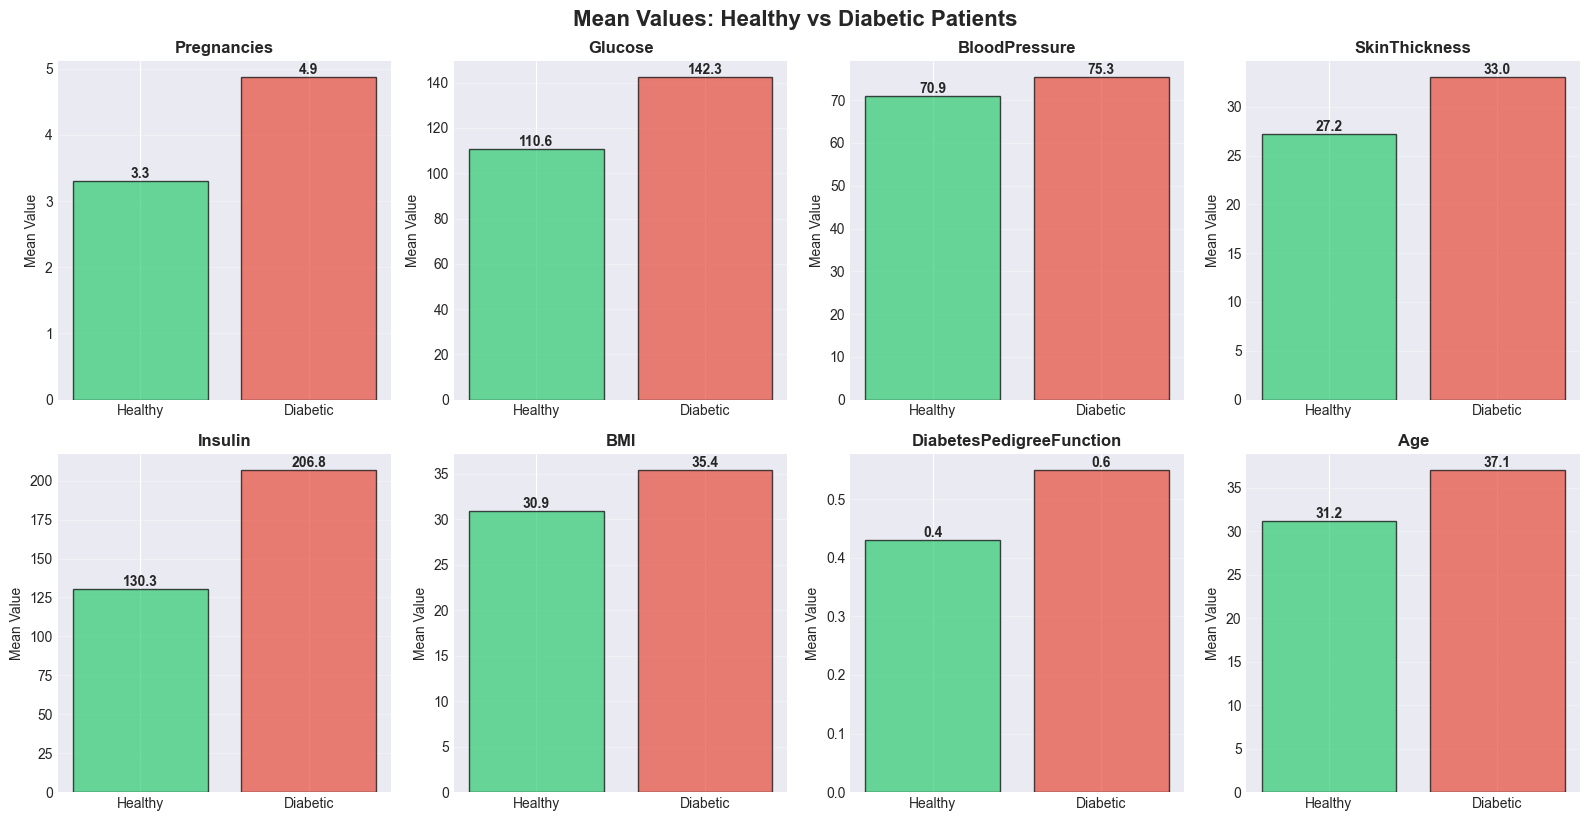


📊 Visualization complete!


In [10]:
# Create comparison bar chart
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Prepare data
    means = [stats_df.loc[feature, 'healthy_mean'], 
             stats_df.loc[feature, 'diabetic_mean']]
    labels = ['Healthy', 'Diabetic']
    colors = ['#2ecc71', '#e74c3c']
    
    # Create bar chart
    bars = ax.bar(labels, means, color=colors, edgecolor='black', alpha=0.7)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontweight='bold')
    
    # Formatting
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_ylabel('Mean Value')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Mean Values: Healthy vs Diabetic Patients', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n📊 Visualization complete!")

### 💡 Key Observations

Look at the charts above and note which features show the **biggest differences** between groups:

---

In [11]:
# Identify features with largest differences
print("\n=== FEATURES WITH LARGEST DIFFERENCES ===")
print("\nAbsolute difference in means (Diabetic - Healthy):\n")

differences = stats_df[['difference']].copy()
differences['abs_difference'] = differences['difference'].abs()
differences = differences.sort_values('abs_difference', ascending=False)

for feature in differences.index:
    diff = differences.loc[feature, 'difference']
    abs_diff = differences.loc[feature, 'abs_difference']
    direction = "higher" if diff > 0 else "lower"
    
    print(f"{feature:30s}: {diff:+7.2f} (Diabetic patients are {direction})")

print("\n💡 The features with the largest differences are the best predictors of diabetes risk!")


=== FEATURES WITH LARGEST DIFFERENCES ===

Absolute difference in means (Diabetic - Healthy):

Insulin                       :  +76.56 (Diabetic patients are higher)
Glucose                       :  +31.68 (Diabetic patients are higher)
Age                           :   +5.88 (Diabetic patients are higher)
SkinThickness                 :   +5.76 (Diabetic patients are higher)
BMI                           :   +4.55 (Diabetic patients are higher)
BloodPressure                 :   +4.44 (Diabetic patients are higher)
Pregnancies                   :   +1.57 (Diabetic patients are higher)
DiabetesPedigreeFunction      :   +0.12 (Diabetic patients are higher)

💡 The features with the largest differences are the best predictors of diabetes risk!


## Step 3: Calculate Percentiles for Risk Assessment

### What Are Percentiles?

A **percentile** tells you what percentage of the data falls below a certain value.

**Example:**
- If BMI = 32 is at the 75th percentile, that means:
  - 75% of people have BMI ≤ 32
  - 25% of people have BMI > 32
  - "You're in the top 25% for BMI"

**Why we need this:** To give users feedback like "Your glucose level is higher than 68% of healthy individuals."

---

In [12]:
# Calculate percentiles for healthy group (this is our baseline)
# We'll use these to assess user risk

percentiles = [10, 25, 50, 75, 90]  # 10th, 25th, 50th (median), 75th, 90th

healthy_percentiles = {}

for feature in features:
    healthy_percentiles[feature] = {}
    for p in percentiles:
        # Calculate the value at this percentile
        value = healthy[feature].quantile(p/100)
        healthy_percentiles[feature][f'p{p}'] = value

# Convert to DataFrame
percentiles_df = pd.DataFrame(healthy_percentiles).T
percentiles_df = percentiles_df.round(2)

print("\n=== PERCENTILES FOR HEALTHY INDIVIDUALS ===")
print("\n", percentiles_df)

print("\n💡 Use these values to determine if a user's measurements are normal or elevated")
print("   Example: If user's BMI > p75, they're in the top 25% (higher than 75% of healthy people)")


=== PERCENTILES FOR HEALTHY INDIVIDUALS ===

                             p10    p25     p50     p75    p90
Pregnancies                0.00   1.00    2.00    5.00    8.0
Glucose                   83.00  93.00  107.00  125.00  143.4
BloodPressure             56.00  62.00   70.00   78.00   86.0
SkinThickness             15.00  19.00   27.00   33.00   41.0
Insulin                   48.00  66.00  102.50  161.25  250.5
BMI                       23.00  25.60   30.10   35.30   39.4
DiabetesPedigreeFunction   0.16   0.23    0.34    0.56    0.8
Age                       21.00  23.00   27.00   37.00   48.0

💡 Use these values to determine if a user's measurements are normal or elevated
   Example: If user's BMI > p75, they're in the top 25% (higher than 75% of healthy people)


### 🎯 Creating a Risk Assessment Function

Now let's create a function that determines what percentile a user's value falls into.

**This is the foundation of your risk assessment logic!**

---

In [15]:
def calculate_percentile_rank(feature, value, reference_group=healthy):
    """
    Calculate what percentile a given value falls into.
    
    Parameters:
    -----------
    feature : str
        The feature name (e.g., 'BMI', 'Glucose')
    value : float
        The user's value
    reference_group : DataFrame
        The comparison group (default: healthy individuals)
    
    Returns:
    --------
    float : The percentile (0-100)
    
    Example:
    --------
    >>> calculate_percentile_rank('BMI', 32, healthy)
    75.5
    # Means: This BMI is higher than 75.5% of healthy individuals
    """
    # Get all values for this feature (excluding NaN)
    feature_values = reference_group[feature].dropna()
    
    # Calculate how many values are less than or equal to the user's value
    count_below = (feature_values <= value).sum()
    
    # Calculate percentile
    percentile = (count_below / len(feature_values)) * 100
    
    return percentile

# Test the function
print("\n=== TESTING PERCENTILE FUNCTION ===")
print("\nTest case: BMI = 32")
test_percentile = calculate_percentile_rank('BMI', 32, healthy)
print(f"Result: {test_percentile:.1f}th percentile")
print(f"Interpretation: This BMI is higher than {test_percentile:.1f}% of healthy individuals")

print("\n✅ Percentile function working correctly!")


=== TESTING PERCENTILE FUNCTION ===

Test case: BMI = 32
Result: 58.7th percentile
Interpretation: This BMI is higher than 58.7% of healthy individuals

✅ Percentile function working correctly!


## Step 4: Create Risk Categories

### Defining Risk Levels

Based on percentiles, we can categorize values into risk levels:

| Percentile | Risk Level | Meaning |
|------------|------------|----------|
| 0-25 | ✅ **Low** | Below average, healthy range |
| 25-75 | ⚠️ **Normal** | Average, typical range |
| 75-90 | ⚠️ **Elevated** | Above average, worth monitoring |
| 90-100 | 🔴 **High** | Top 10%, significant concern |

---

In [18]:
def get_risk_level(percentile, feature):
    """
    Determine risk level based on percentile.
    
    Parameters:
    -----------
    percentile : float
        The percentile value (0-100)
    feature : str
        The feature name (for context)
    
    Returns:
    --------
    dict : Risk level info with emoji, category, and message
    """
    if percentile < 25:
        return {
            'emoji': '✅',
            'level': 'Low',
            'message': f'Your {feature} is in the healthy range (lower than average)'
        }
    elif percentile < 75:
        return {
            'emoji': '⚠️',
            'level': 'Normal',
            'message': f'Your {feature} is in the typical range'
        }
    elif percentile < 90:
        return {
            'emoji': '⚠️',
            'level': 'Elevated',
            'message': f'Your {feature} is above average and worth monitoring'
        }
    else:
        return {
            'emoji': '🔴',
            'level': 'High',
            'message': f'Your {feature} is significantly elevated'
        }

# Test the risk level function
print("\n=== TESTING RISK LEVEL FUNCTION ===")

test_cases = [
    ('BMI', 25, 'Low'),
    ('Glucose', 120, 'Normal'),
    ('BloodPressure', 85, 'Elevated'),
    ('Age', 65, 'High')
]

for feature, value, expected in test_cases:
    percentile = calculate_percentile_rank(feature, value, healthy)
    risk = get_risk_level(percentile, feature)
    
    print(f"\n{feature} = {value}:")
    print(f"  Percentile: {percentile:.1f}")
    print(f"  {risk['emoji']} Risk Level: {risk['level']}")
    print(f"  {risk['message']}")

print("\n✅ Risk level function working correctly!")


=== TESTING RISK LEVEL FUNCTION ===

BMI = 25:
  Percentile: 21.4
  ✅ Risk Level: Low
  Your BMI is in the healthy range (lower than average)

Glucose = 120:
  Percentile: 69.0
  ⚠️ Risk Level: Normal
  Your Glucose is in the typical range

BloodPressure = 85:
  Percentile: 88.1
  ⚠️ Risk Level: Elevated
  Your BloodPressure is above average and worth monitoring

Age = 65:
  Percentile: 98.2
  🔴 Risk Level: High
  Your Age is significantly elevated

✅ Risk level function working correctly!


## Step 5: Visualize Distributions with Risk Zones

Let's create visualizations showing where different risk levels fall in the data distribution.

---

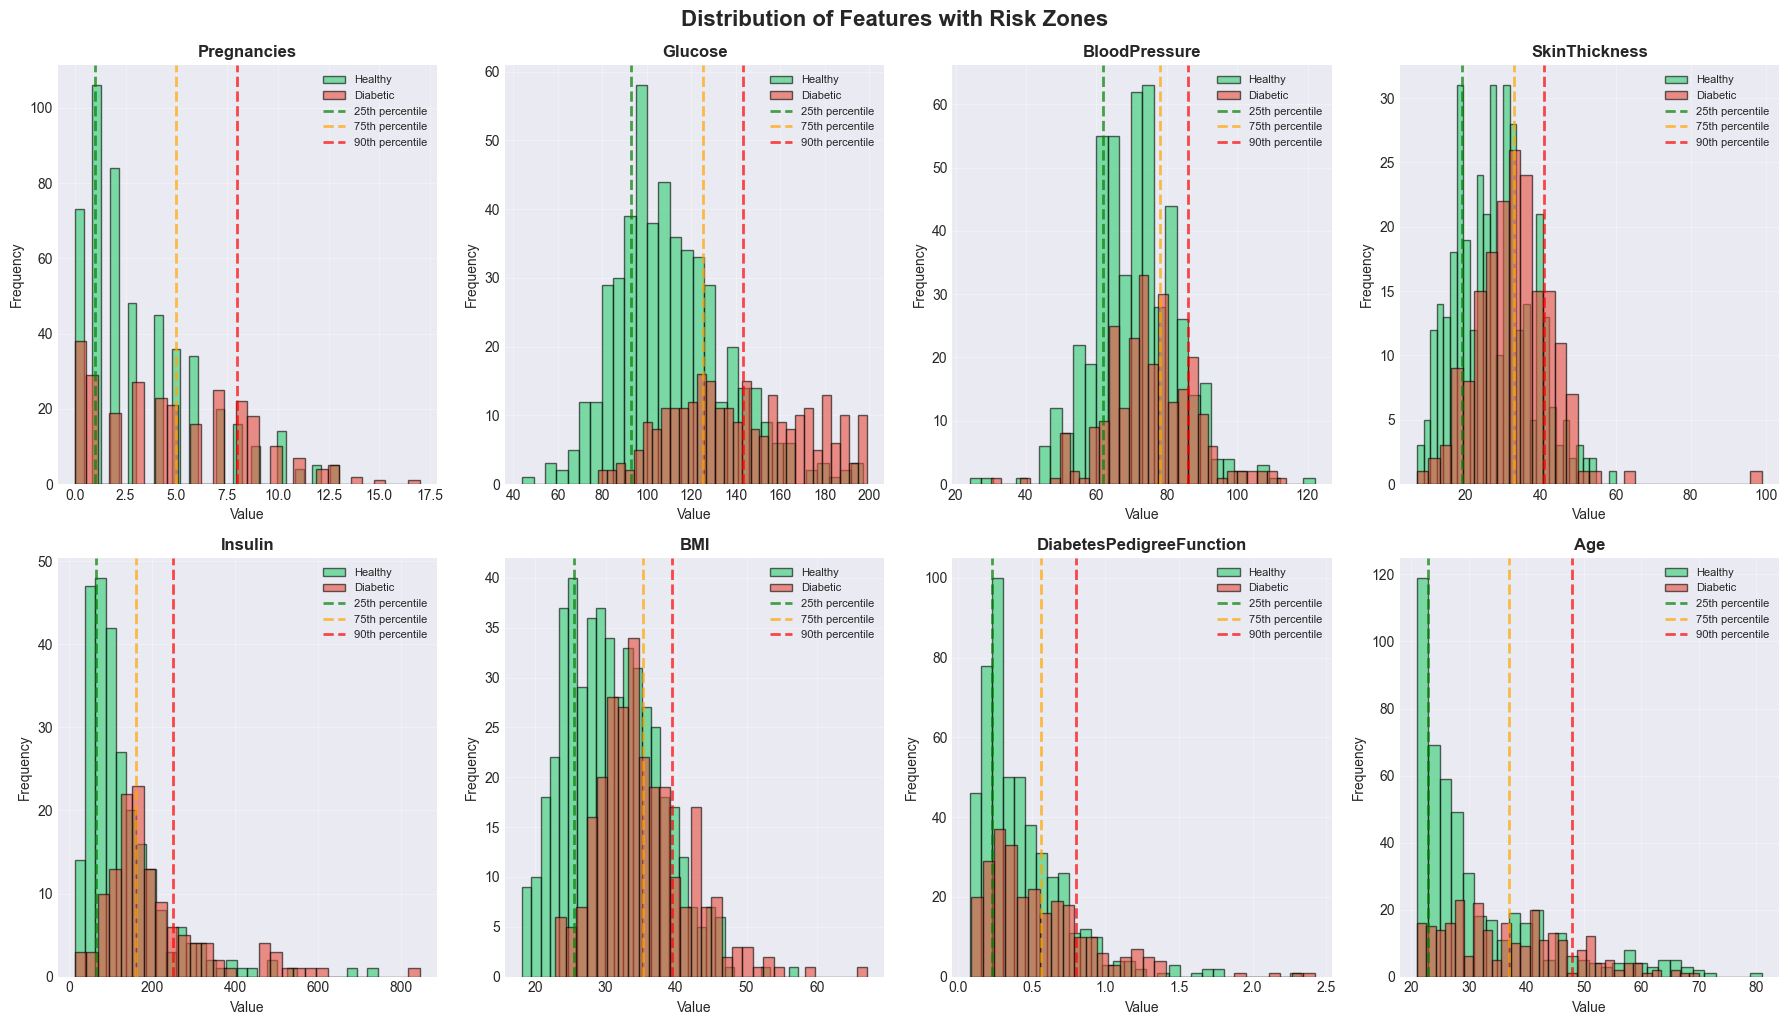


📊 Risk zone visualizations complete!

💡 The dashed lines show the boundaries between risk levels:
   Green (25th) = Low risk threshold
   Orange (75th) = Elevated risk threshold
   Red (90th) = High risk threshold


In [17]:
# Create distribution plots with risk zones
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Get clean data (no NaN)
    healthy_data = healthy[feature].dropna()
    diabetic_data = diabetic[feature].dropna()
    
    # Create histogram
    ax.hist(healthy_data, bins=30, alpha=0.6, label='Healthy', color='#2ecc71', edgecolor='black')
    ax.hist(diabetic_data, bins=30, alpha=0.6, label='Diabetic', color='#e74c3c', edgecolor='black')
    
    # Add percentile lines
    p25 = healthy_data.quantile(0.25)
    p75 = healthy_data.quantile(0.75)
    p90 = healthy_data.quantile(0.90)
    
    ax.axvline(p25, color='green', linestyle='--', linewidth=2, alpha=0.7, label='25th percentile')
    ax.axvline(p75, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='75th percentile')
    ax.axvline(p90, color='red', linestyle='--', linewidth=2, alpha=0.7, label='90th percentile')
    
    # Formatting
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Features with Risk Zones', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n📊 Risk zone visualizations complete!")
print("\n💡 The dashed lines show the boundaries between risk levels:")
print("   Green (25th) = Low risk threshold")
print("   Orange (75th) = Elevated risk threshold")
print("   Red (90th) = High risk threshold")

## Step 6: Create Reference Data Structure for Your App

Now let's package all this statistical data into a format your Streamlit app can easily use.

**Think of this as creating a "configuration file" for your app.**

---

In [19]:
# Create comprehensive reference data
reference_data = {}

for feature in features:
    # Get clean data
    healthy_data = healthy[feature].dropna()
    diabetic_data = diabetic[feature].dropna()
    
    reference_data[feature] = {
        # Summary statistics
        'healthy_mean': float(healthy_data.mean()),
        'healthy_std': float(healthy_data.std()),
        'diabetic_mean': float(diabetic_data.mean()),
        'diabetic_std': float(diabetic_data.std()),
        
        # Percentiles
        'p10': float(healthy_data.quantile(0.10)),
        'p25': float(healthy_data.quantile(0.25)),
        'p50': float(healthy_data.quantile(0.50)),
        'p75': float(healthy_data.quantile(0.75)),
        'p90': float(healthy_data.quantile(0.90)),
        
        # Value ranges
        'min': float(healthy_data.min()),
        'max': float(healthy_data.max()),
    }

# Display sample
print("\n=== REFERENCE DATA STRUCTURE ===")
print("\nExample: BMI reference data")
import json
print(json.dumps(reference_data['BMI'], indent=2))

print("\n✅ Reference data structure created!")
print(f"\nTotal features with reference data: {len(reference_data)}")


=== REFERENCE DATA STRUCTURE ===

Example: BMI reference data
{
  "healthy_mean": 30.859674134419553,
  "healthy_std": 6.560736884300686,
  "diabetic_mean": 35.40676691729323,
  "diabetic_std": 6.6149823712450315,
  "p10": 23.0,
  "p25": 25.6,
  "p50": 30.1,
  "p75": 35.3,
  "p90": 39.4,
  "min": 18.2,
  "max": 57.3
}

✅ Reference data structure created!

Total features with reference data: 8


## Step 7: Save Reference Data for Your App

Let's save this reference data so your Streamlit app can load it.

**Options:**
1. Save as JSON file (easy to read, portable)
2. Save as Python dictionary in a .py file (can import directly)
3. Save as pickle file (Python-specific, fastest)

We'll use JSON for portability.

---

In [20]:
import json

# Save reference data as JSON
with open('diabetes_reference_data.json', 'w') as f:
    json.dump(reference_data, f, indent=2)

print("✅ Reference data saved as 'diabetes_reference_data.json'")
print("\nYour Streamlit app can load this file to access all statistical baselines!")

# Also save the functions we created
print("\n📝 Functions to include in your Streamlit app:")
print("  1. calculate_percentile_rank()")
print("  2. get_risk_level()")
print("\n💡 Copy these functions into your Streamlit app code!")

✅ Reference data saved as 'diabetes_reference_data.json'

Your Streamlit app can load this file to access all statistical baselines!

📝 Functions to include in your Streamlit app:
  1. calculate_percentile_rank()
  2. get_risk_level()

💡 Copy these functions into your Streamlit app code!


## Step 8: Test Complete Risk Assessment

Let's test the complete workflow with a sample patient.

---

In [ ]:
def assess_patient_risk(patient_data):
    """
    Complete risk assessment for a patient.
    
    Parameters:
    -----------
    patient_data : dict
        Dictionary with patient measurements
    
    Returns:
    --------
    dict : Risk assessment results
    """
    results = {}
    risk_scores = []
    
    print("\n" + "="*60)
    print("PATIENT RISK ASSESSMENT")
    print("="*60)
    
    for feature, value in patient_data.items():
        if feature in features:
            # Calculate percentile
            percentile = calculate_percentile_rank(feature, value, healthy)
            
            # Get risk level
            risk = get_risk_level(percentile, feature)
            
            # Store results
            results[feature] = {
                'value': value,
                'percentile': percentile,
                'risk_level': risk['level'],
                'emoji': risk['emoji'],
                'message': risk['message']
            }
            
            # Track risk scores for overall assessment
            if risk['level'] == 'High':
                risk_scores.append(3)
            elif risk['level'] == 'Elevated':
                risk_scores.append(2)
            elif risk['level'] == 'Normal':
                risk_scores.append(1)
            else:
                risk_scores.append(0)
            
            # Display
            print(f"\n{feature}:")
            print(f"  Value: {value}")
            print(f"  {risk['emoji']} Percentile: {percentile:.1f}th")
            print(f"  Risk Level: {risk['level']}")
            print(f"  {risk['message']}")
    
    # Calculate overall risk
    avg_risk_score = sum(risk_scores) / len(risk_scores) if risk_scores else 0
    
    if avg_risk_score >= 2:
        overall = "🔴 HIGH RISK - Multiple elevated risk factors"
    elif avg_risk_score >= 1:
        overall = "⚠️ MODERATE RISK - Some risk factors present"
    else:
        overall = "✅ LOW RISK - Most factors in healthy range"
    
    print("\n" + "="*60)
    print(f"OVERALL ASSESSMENT: {overall}")
    print("="*60)
    
    results['overall_assessment'] = overall
    return results

# Test with a sample patient
sample_patient = {
    'Pregnancies': 2,
    'Glucose': 140,
    'BloodPressure': 88,
    'SkinThickness': 28,
    'Insulin': 150,
    'BMI': 34.5,
    'DiabetesPedigreeFunction': 0.8,
    'Age': 45
}

assessment = assess_patient_risk(sample_patient)

print("\n✅ Complete risk assessment function working!")

---

## 📋 Phase 3 Summary: What You've Built

### ✅ Completed Tasks:

1. **✓ Statistical Baselines** - Calculated mean, median, std for both groups
2. **✓ Percentile System** - Created percentile rankings for risk assessment
3. **✓ Risk Categories** - Defined Low/Normal/Elevated/High risk levels
4. **✓ Comparison Functions** - Built `calculate_percentile_rank()` and `get_risk_level()`
5. **✓ Complete Assessment** - Created `assess_patient_risk()` function
6. **✓ Reference Data** - Saved statistical baselines to JSON file
7. **✓ Visualizations** - Created distribution plots with risk zones

### 📦 Deliverables:

- **diabetes_reference_data.json** - Statistical reference data
- **Three Python functions** ready for your Streamlit app:
  - `calculate_percentile_rank()`
  - `get_risk_level()`
  - `assess_patient_risk()`

---

## 🎯 What's Next: Phase 4

### Phase 4: Build Your First Streamlit App

Now that you have:
- Statistical baselines ✅
- Risk assessment functions ✅
- Reference data ✅

You're ready to build the actual web application!

**Next steps:**
1. Create a simple Streamlit app with an input form
2. Connect it to your risk assessment functions
3. Display results to the user
4. Test it locally

---

## 💡 Key Concepts Learned

### Statistical Concepts:
- **Percentiles** - Understanding data distribution
- **Group comparisons** - Diabetic vs healthy populations
- **Risk stratification** - Categorizing values into risk levels

### Python Skills:
- `.quantile()` - Calculate percentiles
- `.dropna()` - Remove missing values
- `.mean()`, `.std()`, `.median()` - Summary statistics
- Dictionary comprehensions - Create nested data structures
- JSON serialization - Save data for later use

### Development Skills:
- Modular function design - Reusable components
- Data packaging - Preparing data for applications
- Testing - Validating functions work correctly

---

## 🎓 Portfolio Impact

This phase demonstrates:
- **Statistical thinking** - Understanding data distributions
- **Problem decomposition** - Breaking complex problems into functions
- **Domain knowledge** - Healthcare/medical data understanding
- **Code organization** - Creating reusable, well-documented code

---

**Ready for Phase 4?** Let me know and I'll create the Streamlit app tutorial!

---